In [8]:
import pandas as pd
import matplotlib.pyplot as plt

imput_file_path = "/Users/joesouber/OneDrive - University of Bristol/MSc Data Science/data science mini project/dsmp-2024-group-13/vdjdb_full.txt"
data = pd.read_csv(imput_file_path, sep='\t')
df = pd.DataFrame(data)

relevant_columns = [
    'cdr3.alpha', 'v.alpha', 'j.alpha', 'cdr3.beta', 'v.beta', 'd.beta', 'j.beta',
    'species', 'mhc.a', 'mhc.b', 'antigen.gene','antigen.epitope', 'vdjdb.score'
]
# For the purpose of this example, we won't filter out lower-quality scores to avoid data imbalance,
# but in practice, you may want to consider this based on the dataset's size and distribution.
filtered_data = df[relevant_columns]
# Displaying the first few rows of the filtered dataset to verify the selection
filtered_data
# Checking for missing values in crucial columns
missing_values = filtered_data.isnull().sum()

# Examining the number of unique values in categorical columns for potential encoding strategies
unique_values = filtered_data.nunique()

# Removing rows with missing cdr3 sequences
df_cleaned = filtered_data.dropna(subset=['cdr3.alpha', 'cdr3.beta'])
df_cleaned.reset_index(drop=True, inplace=True)

missing_values_df_cleaned = df_cleaned.isnull().sum()
report = {
    "Missing Values": missing_values,
    "Missing Values df_cleaned": missing_values_df_cleaned
}

report

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/599243024.py:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(imput_file_path, sep='\t')


{'Missing Values': cdr3.alpha         24128
 v.alpha            24204
 j.alpha            25157
 cdr3.beta           7455
 v.beta              7446
 d.beta             41741
 j.beta              7541
 species                0
 mhc.a                  0
 mhc.b                  0
 antigen.gene          31
 antigen.epitope        0
 vdjdb.score            0
 dtype: int64,
 'Missing Values df_cleaned': cdr3.alpha             0
 v.alpha                2
 j.alpha              742
 cdr3.beta              0
 v.beta                 9
 d.beta             13811
 j.beta                80
 species                0
 mhc.a                  0
 mhc.b                  0
 antigen.gene          31
 antigen.epitope        0
 vdjdb.score            0
 dtype: int64}

after an initial cleaning, we have removed all rows with missing entries for the vital cdr3.alpha and beta columns. Furthermore, there are also now no missing entries for the antigen.epitope column. from prior resaerch the v.alpha and v.beta columns are the next most important, with 2 and 9 missing entries respectively (meaning should we want these columns for supervised learning, further cleaning is required, however only max(11) rows.). J.alpha and beta require significantly more rows to be removed and d.beta has a very substantial number. 

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/1116036873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)


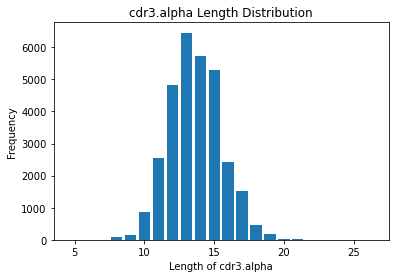

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/1116036873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)


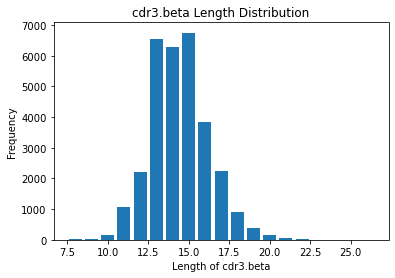

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/1116036873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)


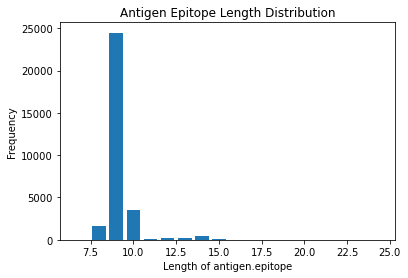

In [9]:
def plot_length_distribution(df, column_name, plot_title):
    """
    Plots a bar chart for the length distribution of the sequences in the specified column.

    Parameters:
    df (DataFrame): The data frame containing the sequences.
    column_name (str): The name of the column to plot.
    plot_title (str): The title of the plot.
    """
    # Calculate the length of sequences
    df[column_name + '.length'] = df[column_name].apply(len)
    
    # Get the value counts of lengths and sort by index (length)
    length_counts = df[column_name + '.length'].value_counts().sort_index()
    
    # Plotting the bar chart
    plt.bar(length_counts.index, length_counts.values)
    plt.title(plot_title)
    plt.xlabel('Length of ' + column_name)
    plt.ylabel('Frequency')
    plt.show()

# Assuming df is your cleaned DataFrame
# Plot the length distributions
plot_length_distribution(df_cleaned, 'cdr3.alpha', 'cdr3.alpha Length Distribution')
plot_length_distribution(df_cleaned, 'cdr3.beta', 'cdr3.beta Length Distribution')
plot_length_distribution(df_cleaned, 'antigen.epitope', 'Antigen Epitope Length Distribution')


/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_21291/2998686784.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '.length'] = df[column].apply(len)


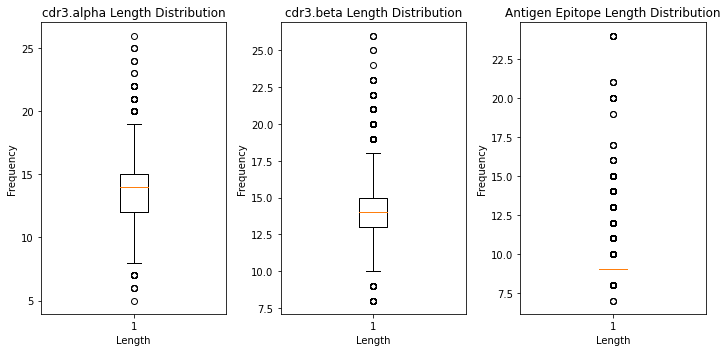

In [10]:
def plot_boxplots(df, columns, plot_titles):
    """
    Plots box plots for the length distribution of sequences in the specified columns.

    Parameters:
    df (DataFrame): The data frame containing the sequences.
    columns (list): The list of column names to plot.
    plot_titles (list): The list of titles for the plots.
    """
    # Calculate the length of sequences for each specified column
    for column in columns:
        df[column + '.length'] = df[column].apply(len)
    
    # Number of plots
    num_plots = len(columns)
    
    # Creating box plots
    plt.figure(figsize=(10, 5))  # Adjust the size as needed
    for i in range(num_plots):
        plt.subplot(1, num_plots, i+1)
        plt.boxplot(df[columns[i] + '.length'])
        plt.title(plot_titles[i])
        plt.xlabel('Length')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

# Define the columns to plot
columns_to_plot = ['cdr3.alpha', 'cdr3.beta', 'antigen.epitope']
titles_to_plot = ['cdr3.alpha Length Distribution', 'cdr3.beta Length Distribution', 'Antigen Epitope Length Distribution']

# Assuming df_cleaned is your cleaned DataFrame
# Plot the box plots
plot_boxplots(df_cleaned, columns_to_plot, titles_to_plot)


The histograms and box plots show the nature of the distribution of the data. 

cdr3.alpha: The data has a relatively narrow interquartile range (IQR), with the median closer to the top of the box, suggesting a skew towards lower values. There are numerous outliers, both above and below the whiskers.

cdr3.beta : This plot has a wider IQR compared to the first, indicating more variability in the data. The median is also closer to the bottom of the box, implying a skew towards higher values. There are many outliers, primarily above the upper whisker.

antigen.epitope: The distribution is very narrow with an even smaller IQR, and the median is at the lower edge of the box. There are outliers, and notably, one outlier is significantly distant from the rest, indicating a very large value compared to the majority of the data.

These give us justification to further remove rows that could be viewed as outliers.

